In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
class SobelFilter(nn.Module):
    # initialization
    def __init__(self):
        super().__init__()
        self.conv = nn.Conv2d(1,1,(3,3),bias=False,padding=1)
    # forward
    def forward(self, x):
        return self.conv(x)

In [3]:
model = SobelFilter()
layers = [layer for layer in model.parameters()]
print(len(layers))
print(layers[0].data)

1
tensor([[[[-0.0480, -0.0085, -0.2996],
          [ 0.2247,  0.0390,  0.1143],
          [-0.2796,  0.1114, -0.1008]]]])


In [4]:
w = torch.tensor([[[
    [ -1.,  0.,  1.],
    [ -2.,  0.,  2.],
    [ -1.,  0.,  1.]
    ]]])

In [5]:
layers[0].data = w 
print(layers[0].data)

tensor([[[[-1.,  0.,  1.],
          [-2.,  0.,  2.],
          [-1.,  0.,  1.]]]])


In [6]:
input_images = torch.tensor([[[
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    [1,1,1,1,1],
    ]]],dtype=torch.float)

In [7]:
output_images = model(input_images)
print(output_images[0])

tensor([[[ 3.,  0.,  0.,  0., -3.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 4.,  0.,  0.,  0., -4.],
         [ 3.,  0.,  0.,  0., -3.]]], grad_fn=<SelectBackward0>)


In [8]:
input_images = torch.tensor([[[
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0],
    [1,1,0,0,0]
    ]]],dtype=torch.float)

In [9]:
output_images = model(input_images)
print(output_images[0])

tensor([[[ 3., -3., -3.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 4., -4., -4.,  0.,  0.],
         [ 3., -3., -3.,  0.,  0.]]], grad_fn=<SelectBackward0>)


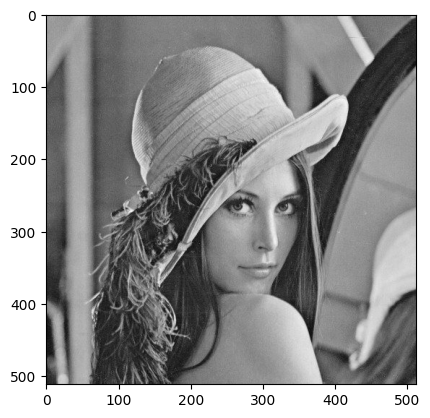

In [11]:
image = cv2.imread('lena.jpg',cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

In [12]:
image.shape
rows,cols = image.shape

In [13]:
input_image = torch.from_numpy(image)
input_image = input_image.unsqueeze(0).float()
input_images = input_image.unsqueeze(0)
input_images.shape

torch.Size([1, 1, 512, 512])

In [14]:
output_images = model(input_images)

In [15]:
output_image = output_images[0]
output_image = output_image.squeeze(0)
output_image = output_image.detach().numpy()
print(output_image.shape)
print(np.amax(output_image))
print(np.amin(output_image))

(512, 512)
683.0
-830.0


In [16]:
np.savetxt('lena-sobel.txt', output_image, fmt='%f')

In [17]:
output_image = abs(output_image);
output_image = cv2.normalize(output_image,None,0,255,cv2.NORM_MINMAX)
output_image = np.uint8(output_image)
cv2.imwrite('lena-sobel.jpg',output_image)

True

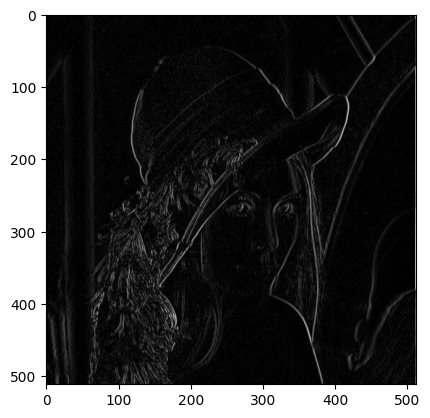

In [18]:
plt.imshow(output_image, cmap='gray')
plt.show()